In [1]:
library('kedd')
library('np')

Nonparametric Kernel Methods for Mixed Datatypes (version 0.60-2)
[vignette("np_faq",package="np") provides answers to frequently asked questions]


In [2]:
data <- read.table('3.txt', header = FALSE)
X <- data[1:nrow(data), 6]
Y <- data[1:nrow(data), 14]

Методом CNN выбираем наилучшее $h$

$kernel
[1] "gaussian"

$deriv.order
[1] 0

$seq.bws
 [1] 0.03470296 0.04343772 0.05217248 0.06090724 0.06964200 0.07837676
 [7] 0.08711152 0.09584628 0.10458104 0.11331580 0.12205056 0.13078532
[13] 0.13952008 0.14825484 0.15698959 0.16572435 0.17445911 0.18319387
[19] 0.19192863 0.20066339 0.20939815 0.21813291 0.22686767 0.23560243
[25] 0.24433719 0.25307195 0.26180671 0.27054147 0.27927623 0.28801099
[31] 0.29674574 0.30548050 0.31421526 0.32295002 0.33168478 0.34041954
[37] 0.34915430 0.35788906 0.36662382 0.37535858 0.38409334 0.39282810
[43] 0.40156286 0.41029762 0.41903238 0.42776714 0.43650190 0.44523665
[49] 0.45397141 0.46270617

$ccv
 [1] 0.019435391 0.016320311 0.014321557 0.013073319 0.012162049 0.011322250
 [7] 0.010407456 0.009395468 0.008355018 0.007384515 0.006563647 0.005933642
[13] 0.005499462 0.005241782 0.005130130 0.005133001 0.005223822 0.005383274
[19] 0.005599114 0.005864705 0.006177159 0.006535662 0.006940194 0.007390709
[25] 0.007886692 0.008426989 0.009009822 0.009632890 0.010293520 0.010988813
[31] 0.011715778 0.012471439 0.013252914 0.014057463 0.014882518 0.015725701
[37] 0.016584816 0.017457849 0.018342949 0.019238418 0.020142692 0.021054325
[43] 0.021971978 0.022894404 0.023820437 0.024748982 0.025679006 0.026609534
[49] 0.027539638 0.028468437

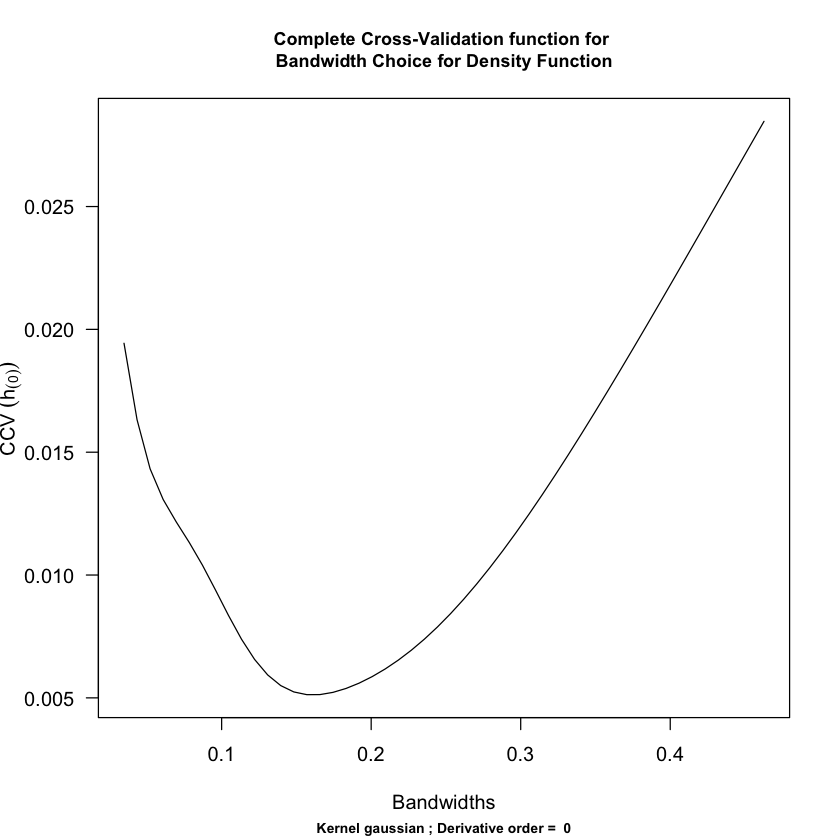

In [3]:
plot(h.ccv(X, kernel = 'gaussian'))
best_h = h.ccv(X, kernel = 'gaussian')$h

Построим графики регрессии Надарая-Ватсона и с помощью smooth spline.

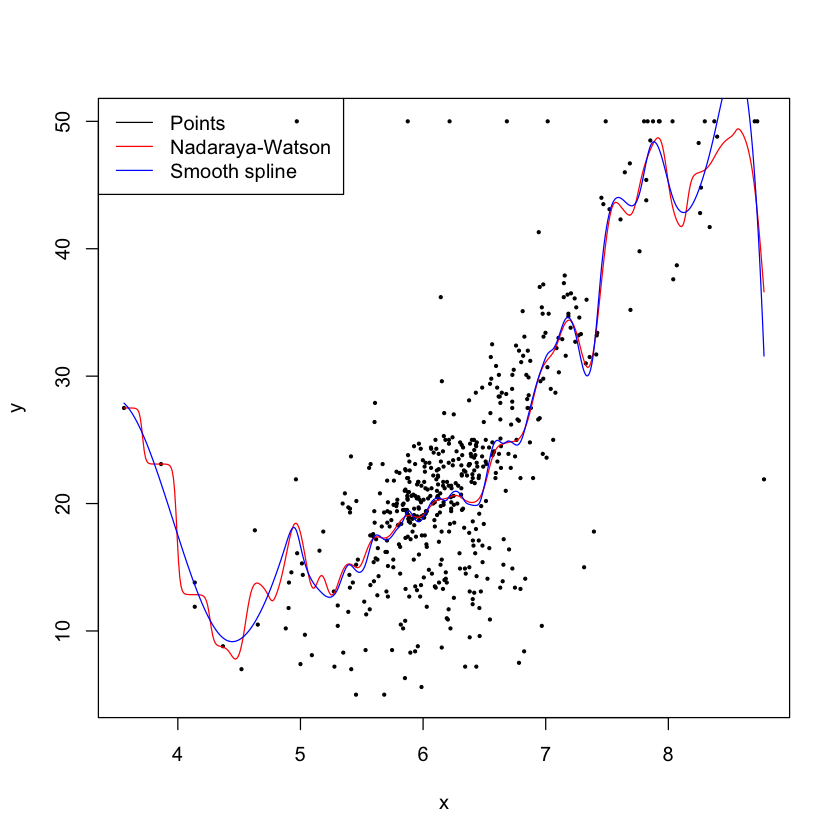

In [4]:
plot(X, Y, xlab = 'x', ylab = 'y', cex = 0.5, pch = 20)
lines(ksmooth(X, Y, bandwidth = best_h, kernel = 'norm'), col = 'red')
spline <- smooth.spline(X, Y)

spline_x <- seq(min(X), max(X), length = 1000)
spline_y = predict(spline, spline_x)$y

lines(spline_x, spline_y, col = 'blue')
legend('topleft', c("Points","Nadaraya-Watson","Smooth spline"),
       lty = c(1, 1, 1), col = c('black','red','blue'), ncol = 1)

Сплайн выдает более гладкую функцию. В остальном результаты похожи.